In [103]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\LE HOANG NHAN\PycharmProjects\merging-dataframes -- Olympic data
['.idea', '.ipynb_checkpoints', 'auto-mpg.csv', 'axis_limits.png', 'Bruce_McCandless_II_during_EVA_in_1984.jpg', 'company-stock-movements-2010-2015-incl.csv', 'finch_beaks_1975.csv', 'finch_beaks_2012.csv', 'fish.csv', 'gm_2008_region.csv', 'house-votes-84.csv', 'iris.csv', 'merging-dataframes-- Olympic data.ipynb', 'percent-bachelors-degrees-women-usa.csv', 'Plotting 2D arrays.ipynb', 'seeds.csv', 'sine_mesh.png', "statistic with Darwin's finches.ipynb", 'stocks.csv', 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv', 'Summer Olympic medallists 1896 to 2008 - EDITIONS.csv', 'supervised-learning-with-scikit-learn.ipynb', 'unsupervised-learning.ipynb', 'venv', 'white-wine.csv', 'women degrees.ipynb', 'xlim_and_ylim.png']


In [104]:
# Read in the data file: df
seeds = pd.read_csv('seeds.csv', header=None)
samples = seeds.iloc[:,0:7]
samples = samples.as_matrix()

C:\Users\LE HOANG NHAN\PycharmProjects\merging-dataframes -- Olympic data\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


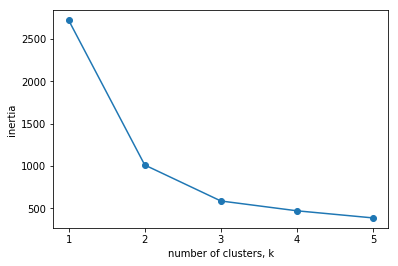

In [105]:
#How many clusters of grain?

from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [106]:
#Evaluating the grain clustering

varieties= list(seeds[7])

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0           9   0  68
1           1  60   0
2          60  10   2


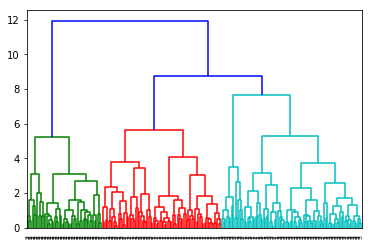

In [108]:
#Hierarchical clustering of the grain data

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()



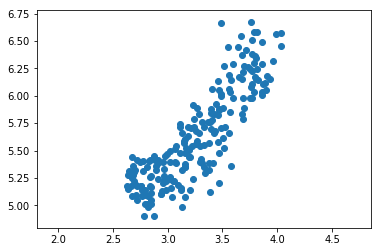

0.8604149377143467


In [116]:
# Read in the data file: df
grains = pd.read_csv('seeds-width-vs-length.csv', header=None)
grains=grains.values

#Correlated data in nature

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


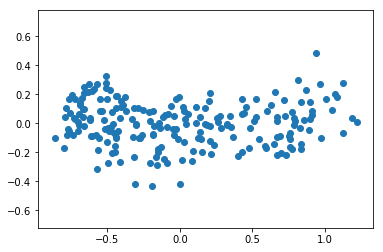

4.983104599635362e-17


In [117]:
#Decorrelating the grain measurements with PCA

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

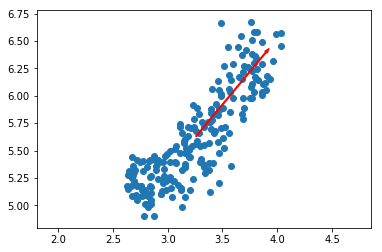

In [118]:
#The first principal component

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [72]:
# Read in the data file: df
fish = pd.read_csv('fish.csv', header=None)
samples = fish.iloc[:,1:7]
samples = samples.as_matrix()


C:\Users\LE HOANG NHAN\PycharmProjects\merging-dataframes -- Olympic data\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [73]:
# Scaling fish data for clustering

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters= 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [76]:
#Clustering the fish data

species= list(fish[0])

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


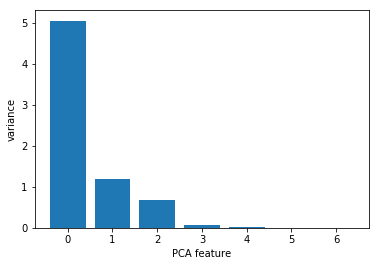

In [119]:
# Variance of the PCA features

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)
# Fit the pipeline to 'samples'
pipeline.fit(samples)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [81]:
# Read in the data file: df
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
print(stocks.head())
movements = stocks.iloc[:,1:]
movements = movements.as_matrix()
print(movements)

         Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
0             Apple    0.580000   -0.220005   -3.409998   -1.170000   
1               AIG   -0.640002   -0.650000   -0.210001   -0.420000   
2            Amazon   -2.350006    1.260009   -2.350006   -2.009995   
3  American express    0.109997    0.000000    0.260002    0.720002   
4            Boeing    0.459999    1.770000    1.549999    2.690003   

   2010-01-08  2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  \
0    1.680011   -2.689994   -1.469994    2.779997   -0.680003  ...   
1    0.710001   -0.200001   -1.130001    0.069999   -0.119999  ...   
2    2.960006   -2.309997   -1.640007    1.209999   -1.790001  ...   
3    0.190003   -0.270001    0.750000    0.300004    0.639999  ...   
4    0.059997   -1.080002    0.360000    0.549999    0.530002  ...   

   2013-10-16  2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  \
0    0.320008    4.519997    2.899987    9.590019   -6.540016    5.959976  

C:\Users\LE HOANG NHAN\PycharmProjects\merging-dataframes -- Olympic data\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [82]:
#Clustering stocks using KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [89]:
#Which stocks move together?

companies=list(stocks.iloc[:,0])
print(companies)
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']
    labels                           companies
49       0                               Total
57       0                               Exxon
35       0  

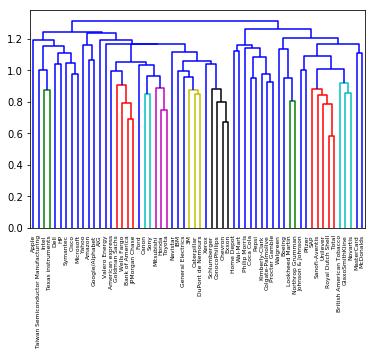

In [91]:
#Hierarchies of stocks

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()


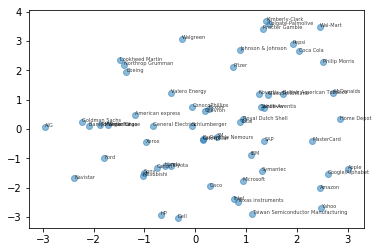

In [111]:
#A t-SNE map of the stock market

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


In [120]:
# Read in the data file: df
samples = pd.read_csv('lcd-digits.csv')
samples=samples.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


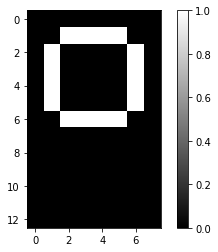

In [122]:
#Explore the LED digits dataset

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

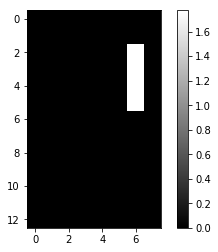

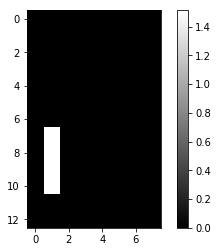

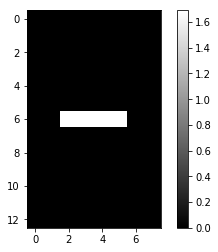

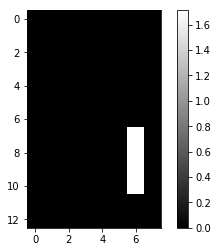

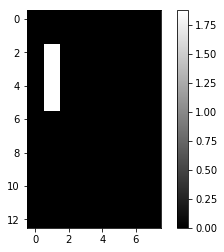

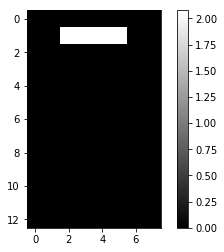

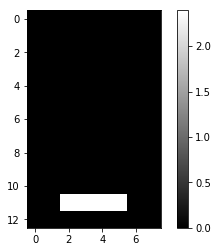

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [123]:
#NMF learns the parts of images

#a function show_as_image()

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)
